In [6]:
import yfinance as yf
import seaborn

In [3]:
aapl = yf.Ticker("aapl").history(period = "5y")
assert not aapl.empty
aapl.head()

/Users/aman2/anaconda3/envs/ollama_lang_chrome_test/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-13 00:00:00-05:00,41.249245,41.511580,40.895453,40.958027,89960800,0.0,0.0
2019-02-14 00:00:00-05:00,40.844908,41.217951,40.765485,41.107243,87342800,0.0,0.0
2019-02-15 00:00:00-05:00,41.215561,41.323864,40.854549,41.015800,98507200,0.0,0.0
2019-02-19 00:00:00-05:00,40.844907,41.261273,40.791958,41.138527,75891200,0.0,0.0
2019-02-20 00:00:00-05:00,41.201109,41.713747,41.152974,41.403275,104457600,0.0,0.0


In [4]:
aapl = aapl.reset_index()
aapl["Date"] = aapl["Date"].dt.date
aapl.set_index("Date")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-13,41.249245,41.511580,40.895453,40.958027,89960800,0.00,0.0
2019-02-14,40.844908,41.217951,40.765485,41.107243,87342800,0.00,0.0
2019-02-15,41.215561,41.323864,40.854549,41.015800,98507200,0.00,0.0
2019-02-19,40.844907,41.261273,40.791958,41.138527,75891200,0.00,0.0
2019-02-20,41.201109,41.713747,41.152974,41.403275,104457600,0.00,0.0
...,...,...,...,...,...,...,...
2024-02-07,190.397053,190.806534,188.369641,189.168625,53439000,0.00,0.0
2024-02-08,189.148646,189.298448,187.111252,188.080017,40962000,0.00,0.0
2024-02-09,188.649994,189.990005,188.000000,188.850006,45099900,0.24,0.0


<Axes: xlabel='Date', ylabel='Close'>

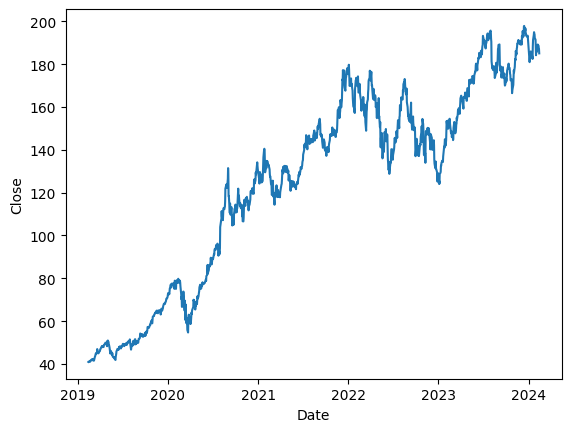

In [7]:
seaborn.lineplot(data = aapl, x = "Date", y = "Close")

In [12]:
start_date, end_date = aapl["Date"].min(), aapl["Date"].max()

In [8]:
from gnews import GNews

In [21]:
google_news = GNews(language = "en", max_results=10, start_date=start_date, end_date=end_date)
apple_news = google_news.get_news('Apple')
apple_news

[{'title': "Introducing Apple Vision Pro: Apple's first spatial computer - Apple",
  'description': "Introducing Apple Vision Pro: Apple's first spatial computer  Apple",
  'published date': 'Mon, 05 Jun 2023 07:00:00 GMT',
  'url': 'https://news.google.com/rss/articles/CBMiRGh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIzLzA2L2ludHJvZHVjaW5nLWFwcGxlLXZpc2lvbi1wcm8v0gEA?oc=5&hl=en-US&gl=US&ceid=US:en',
  'publisher': {'href': 'https://www.apple.com', 'title': 'Apple'}},
 {'title': 'Apple announces App Store Small Business Program - Apple',
  'description': 'Apple announces App Store Small Business Program  Apple',
  'published date': 'Wed, 18 Nov 2020 08:00:00 GMT',
  'url': 'https://news.google.com/rss/articles/CBMiWGh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIwLzExL2FwcGxlLWFubm91bmNlcy1hcHAtc3RvcmUtc21hbGwtYnVzaW5lc3MtcHJvZ3JhbS_SAQA?oc=5&hl=en-US&gl=US&ceid=US:en',
  'publisher': {'href': 'https://www.apple.com', 'title': 'Apple'}},
 {'title': 'Apple brings Final Cut Pro and Logic 

In [35]:
indices_to_delete = []
for index, article in enumerate(apple_news):
    retrieved_article = google_news.get_full_article(article["url"])
    if retrieved_article is None:
        indices_to_delete.append(index)
        continue
    article["fetched_title"] = retrieved_article.title 
    article["fetched_body"] = retrieved_article.text 

def list_bulk_delete(indices, list):
    """
        :arg indices: List of indexes to be removed from the list
        :arg list: List which is to be operated on
        Function removes the indices from the list, in place on the list object
    """
    for idx in sorted(indices, reverse=True):
        del list[idx]
list_bulk_delete(indices_to_delete, apple_news)

apple_news

[{'title': "Introducing Apple Vision Pro: Apple's first spatial computer - Apple",
  'description': "Introducing Apple Vision Pro: Apple's first spatial computer  Apple",
  'published date': 'Mon, 05 Jun 2023 07:00:00 GMT',
  'url': 'https://news.google.com/rss/articles/CBMiRGh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIzLzA2L2ludHJvZHVjaW5nLWFwcGxlLXZpc2lvbi1wcm8v0gEA?oc=5&hl=en-US&gl=US&ceid=US:en',
  'publisher': {'href': 'https://www.apple.com', 'title': 'Apple'},
  'fetched_title': 'Introducing Apple Vision Pro: Apple’s first spatial computer',
  'fetched_body': 'June 5, 2023\n\nPRESS RELEASE\n\nIntroducing Apple Vision Pro: Apple’s first spatial computer\n\nCUPERTINO, CALIFORNIA Apple today unveiled Apple Vision Pro, a revolutionary spatial computer that seamlessly blends digital content with the physical world, while allowing users to stay present and connected to others. Vision Pro creates an infinite canvas for apps that scales beyond the boundaries of a traditional display an

In [33]:
print(f""" 
Publisher: {apple_news[0]['publisher']['title']}
Date: {apple_news[0]["published date"]}
Title: {apple_news[0]['fetched_title']}
Text: 
{apple_news[0]['fetched_body']}
    
""")

 
Publisher: Apple
Date: Mon, 05 Jun 2023 07:00:00 GMT
Title: Introducing Apple Vision Pro: Apple’s first spatial computer
Text: 
June 5, 2023

PRESS RELEASE

Introducing Apple Vision Pro: Apple’s first spatial computer

CUPERTINO, CALIFORNIA Apple today unveiled Apple Vision Pro, a revolutionary spatial computer that seamlessly blends digital content with the physical world, while allowing users to stay present and connected to others. Vision Pro creates an infinite canvas for apps that scales beyond the boundaries of a traditional display and introduces a fully three-dimensional user interface controlled by the most natural and intuitive inputs possible — a user’s eyes, hands, and voice. Featuring visionOS, the world’s first spatial operating system, Vision Pro lets users interact with digital content in a way that feels like it is physically present in their space. The breakthrough design of Vision Pro features an ultra-high-resolution display system that packs 23 million pixels acr

In [36]:
import pandas as pd

In [37]:
pd.DataFrame(apple_news)

,title,description,published date,url,publisher,fetched_title,fetched_body
0,Introducing Apple Vision Pro: Apple's first sp...,Introducing Apple Vision Pro: Apple's first sp...,"Mon, 05 Jun 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiRGh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Introducing Apple Vision Pro: Apple’s first sp...,"June 5, 2023\n\nPRESS RELEASE\n\nIntroducing A..."
1,Apple announces App Store Small Business Progr...,Apple announces App Store Small Business Progr...,"Wed, 18 Nov 2020 08:00:00 GMT",https://news.google.com/rss/articles/CBMiWGh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple announces App Store Small Business Program,“Small businesses are the backbone of our glob...
2,Apple brings Final Cut Pro and Logic Pro to iP...,Apple brings Final Cut Pro and Logic Pro to iP...,"Tue, 09 May 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiWGh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple brings Final Cut Pro and Logic Pro to iPad,"May 9, 2023\n\nPRESS RELEASE\n\nApple brings F..."
3,Apple previews new entertainment experiences l...,Apple previews new entertainment experiences l...,"Tue, 16 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMidGh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple previews new entertainment experiences l...,"January 16, 2024\n\nPRESS RELEASE\n\nApple pre..."
4,Apple unveils new ways to share and communicat...,Apple unveils new ways to share and communicat...,"Mon, 06 Jun 2022 07:00:00 GMT",https://news.google.com/rss/articles/CBMiYWh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple unveils new ways to share and communicat...,"June 6, 2022\n\nPRESS RELEASE\n\nApple unveils..."
5,"Apple TV+ launches November 1, featuring origi...","Apple TV+ launches November 1, featuring origi...","Tue, 10 Sep 2019 07:00:00 GMT",https://news.google.com/rss/articles/CBMifmh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...","Apple TV+ launches November 1, featuring origi...","Cupertino, California — Apple today announced ..."
6,Apple One - Apple,Apple One Apple,"Tue, 15 Sep 2020 18:07:29 GMT",https://news.google.com/rss/articles/CBMiIGh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple One,$25.95/mo.per month\n\nSave $11/mo. on even mo...
7,Apple advances user security with powerful new...,Apple advances user security with powerful new...,"Wed, 07 Dec 2022 08:00:00 GMT",https://news.google.com/rss/articles/CBMiZ2h0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple advances user security with powerful new...,"December 7, 2022\n\nUPDATE\n\nApple advances u..."
8,Apple Vision Pro available in the U.S. on Febr...,Apple Vision Pro available in the U.S. on Febr...,"Mon, 08 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMiWmh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...",Apple Vision Pro available in the U.S. on Febr...,"January 8, 2024\n\nPRESS RELEASE\n\nApple Visi..."
9,"Apple previews Live Speech, Personal Voice, an...","Apple previews Live Speech, Personal Voice, an...","Tue, 16 May 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMidWh0d...,"{'href': 'https://www.apple.com', 'title': 'Ap...","Apple previews Live Speech, Personal Voice, an...","May 16, 2023\n\nPRESS RELEASE\n\nApple introdu..."
